# Bayesian inference under measurement noise

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<b> Problem 3.2 <b>:

In this problem, we numerically calculate a posterior distribution. Suppose the
stimulus distribution ps(s) is Gaussian with mean 20 and standard deviation 4. The measurement
distribution px|s(x|s) is Gaussian with standard deviation σ = 5. A Bayesian observer infers s from
an observed measurement xobs = 30. We are now going to calculate the posterior probability density
using numerical methods.

a) Define a vector of hypothesized stimulus values s: (0, 0.2, 0.4, . . . , 40).

b) Compute the likelihood function and the prior on this vector of s values.

c) Multiply the likelihood and the prior pointwise.

d) Divide this product by its sum over all s (normalization step).

e) Convert this posterior probability mass function into a probability density function by dividing
by the step size you used in your vector of s values (e.g., 0.2).

f) Plot the likelihood, prior, and posterior in the same plot.

g) Is the posterior wider or narrower than likelihood and prior? Do you expect this based on the
equations we discussed?

h) Change the standard deviation of the measurement distribution to a large value. What happens
to the posterior? Can you explain this?

i) Change the standard deviation of the measurement distribution to a small value. What
happens to the posterior? Can you explain this?

In [9]:
#define a vector

step = 0.2
S = np.arange(0,40 + step, step)

#information about stimulus and measurement distributions

mean_S = 20
Sd_S = 4

std_x_given_s = 5
xobs = 30

# Prior distribution 
prior = (1 / (Sd_S * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((S - mean_S) / Sd_S) ** 2)

# Likelihood function (Gaussian)
likelihood = (1 / (std_x_given_s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xobs - S) / std_x_given_s) ** 2)

In [23]:
#now lets multiply likelihood and prior for part c

unnormalized_posterior = prior * likelihood

#we can normalize this with deviding into sum of all values
posterior = unnormalized_posterior / np.sum(unnormalized_posterior * step)
len(posterior)

#deviding by step for posterior density

posterior_density = posterior / step

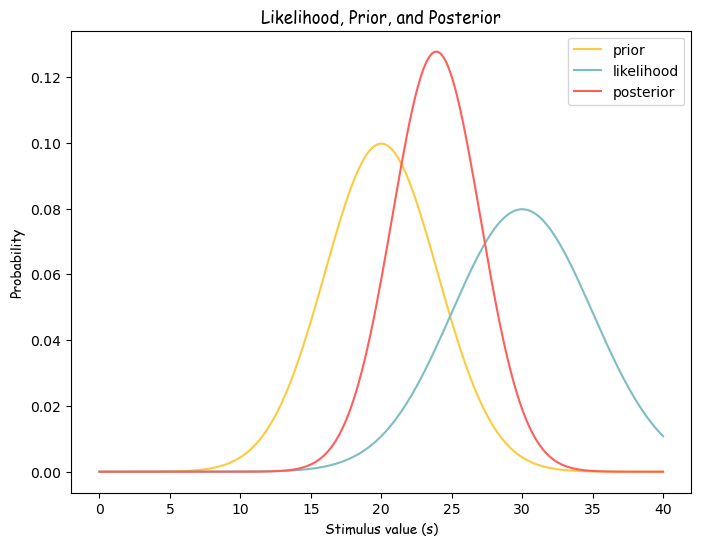

In [41]:
#plotting

plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
plt.figure(figsize= (8,6))
plt.plot(S,prior, color = color_custom[1], label='prior' )
plt.plot(S, likelihood, color = color_custom[2], label='likelihood')
plt.plot(S, posterior, color = color_custom[0], label='posterior')
plt.xlabel('Stimulus value (s)',**csfont)
plt.ylabel('Probability',**csfont)
plt.legend()
plt.title('Likelihood, Prior, and Posterior',**csfont)
plt.tight_layout()
plt.show()

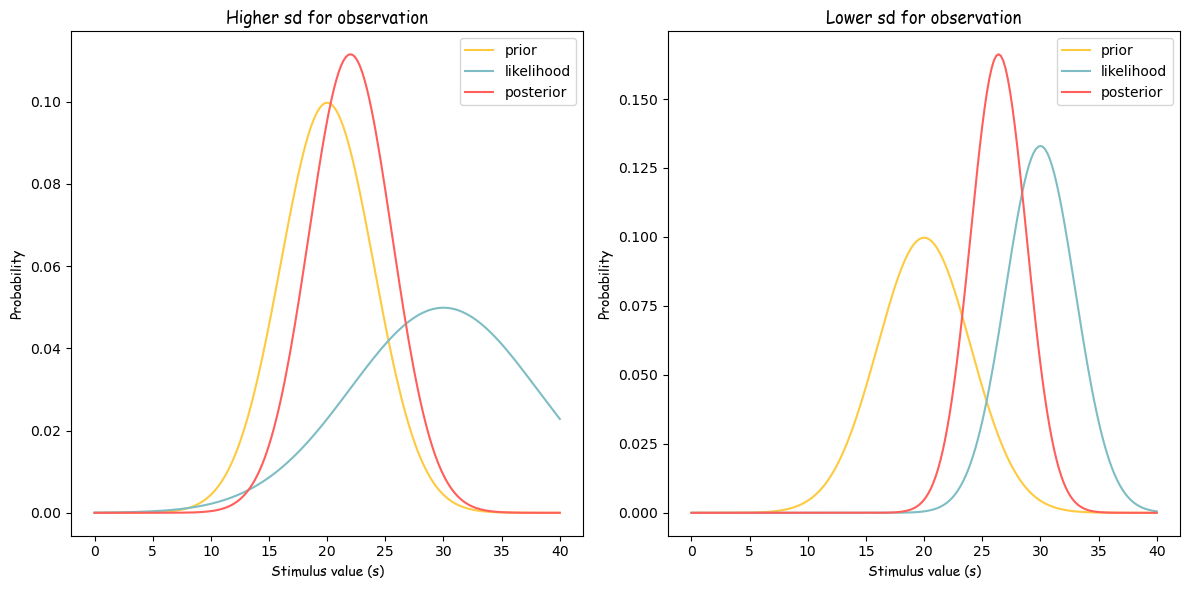

In [57]:
#larger sd
mean_S = 20
Sd_S = 4

std_x_given_s = 8
xobs = 30
# Prior distribution 
prior2 = (1 / (Sd_S * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((S - mean_S) / Sd_S) ** 2)
# Likelihood function (Gaussian)
likelihood2 = (1 / (std_x_given_s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xobs - S) / std_x_given_s) ** 2)

#we can normalize this with deviding into sum of all values
posterior2 = (prior2 * likelihood2) / np.sum((prior2 * likelihood2) * step)

#smaller sd
mean_S = 20
Sd_S = 4

std_x_given_s = 3
xobs = 30
# Prior distribution 
prior3 = (1 / (Sd_S * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((S - mean_S) / Sd_S) ** 2)
# Likelihood function (Gaussian)
likelihood3 = (1 / (std_x_given_s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xobs - S) / std_x_given_s) ** 2)
posterior3 = (prior3 * likelihood3) / np.sum((prior3 * likelihood3) * step)

#plotting
plt.figure(figsize= (12,6))
plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
plt.subplot(1,2,1)
plt.plot(S,prior2, color = color_custom[1], label='prior' )
plt.plot(S, likelihood2, color = color_custom[2], label='likelihood')
plt.plot(S, posterior2, color = color_custom[0], label='posterior')
plt.xlabel('Stimulus value (s)',**csfont)
plt.ylabel('Probability',**csfont)
plt.legend()
plt.title('Higher sd for observation',**csfont)

plt.subplot(1,2,2)
plt.plot(S,prior3, color = color_custom[1], label='prior' )
plt.plot(S, likelihood3, color = color_custom[2], label='likelihood')
plt.plot(S, posterior3, color = color_custom[0], label='posterior')
plt.xlabel('Stimulus value (s)',**csfont)
plt.ylabel('Probability',**csfont)
plt.legend()
plt.title('Lower sd for observation',**csfont)
plt.tight_layout()
plt.show()